In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(color_codes=True)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, get_scorer_names
from scipy.stats import shapiro
from sklearn.model_selection import GridSearchCV

In [54]:
df = pd.read_csv("../Data/Raw/Sleep_Efficiency.csv")
df

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


In [116]:
df.shape

(452, 15)

In [55]:
df.isna().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [56]:
df.columns

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

In [124]:
df.drop(columns='ID', inplace=True)
df.columns

Index(['Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

In [121]:
df.select_dtypes(include='object').nunique()

Gender              2
Bedtime           424
Wakeup time       434
Smoking status      2
dtype: int64

In [57]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [59]:
# filling missing values with the median values of the feature to preserve categoricalness
df['Awakenings'] = df['Awakenings'].fillna(df['Awakenings'].median())
df['Alcohol consumption'] = df['Alcohol consumption'].fillna(df['Alcohol consumption'].median())
df['Caffeine consumption'] = df['Caffeine consumption'].fillna(df['Caffeine consumption'].median())
df['Exercise frequency'] = df['Exercise frequency'].fillna(df['Exercise frequency'].median())


In [60]:
df.isna().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

In [127]:
df.columns

Index(['Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

In [136]:
df.select_dtypes(include = "object").columns

Index(['Gender', 'Bedtime', 'Wakeup time', 'Smoking status'], dtype='object')

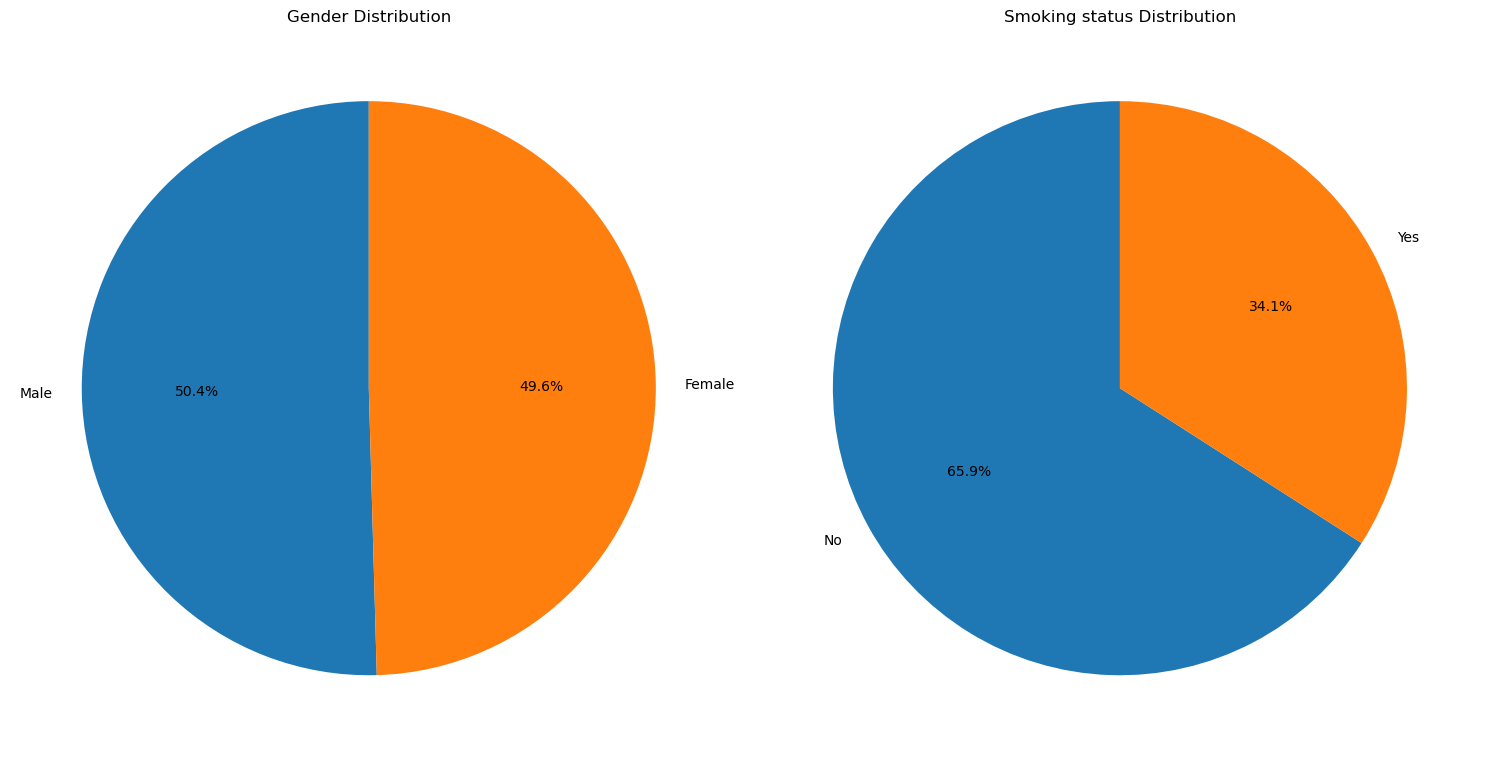

In [138]:
#Specify the maximum number of categories to show individually
max_categories = 5

vars = ['Gender', 'Smoking status']

# Create a figure and axes
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

# Create a pie chart for each categorical variable
for i, var in enumerate(vars):
    if i < len(axs.flat):
        # Count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
        
            cat_counts = pd.concat([cat_counts_top, cat_counts_other])

        # Create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # Set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

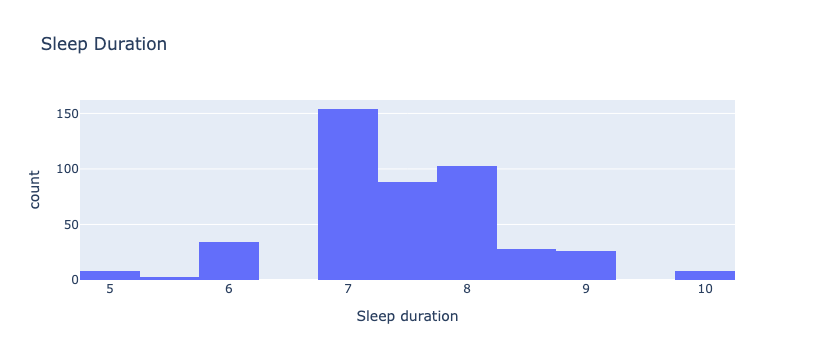

In [61]:
import plotly.express as px
fig = px.histogram(df, x = 'Sleep duration', nbins = 20, title = 'Sleep Duration')
fig.show()

In [75]:
df.Gender.value_counts()

Gender
Male      228
Female    224
Name: count, dtype: int64

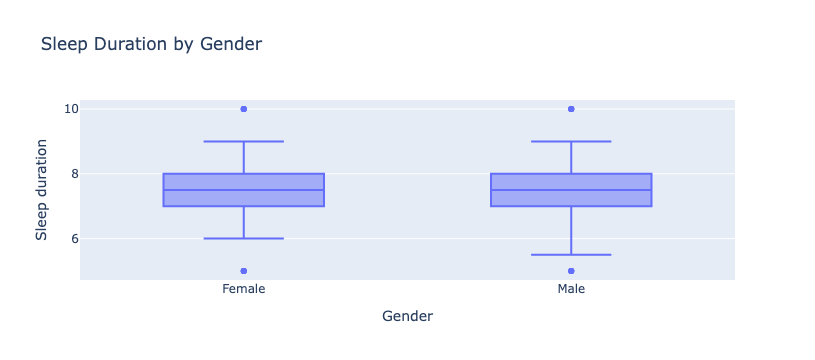

In [62]:
fig = px.box(df, y = "Sleep duration", x = "Gender", title = "Sleep Duration by Gender")
fig.show()

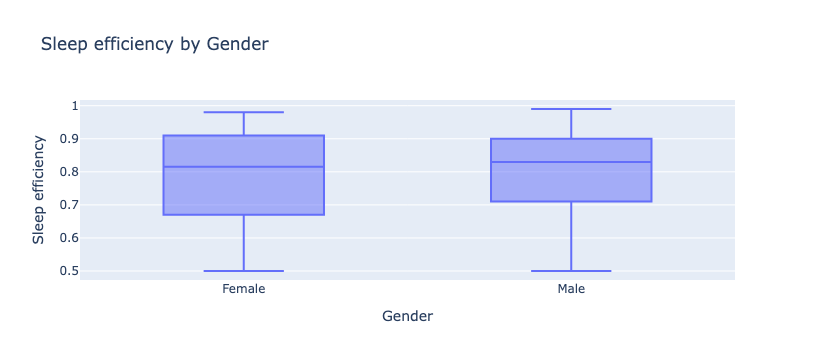

In [163]:
fig = px.box(df, y = "Sleep efficiency", x = "Gender", title = "Sleep efficiency by Gender")
fig.show()

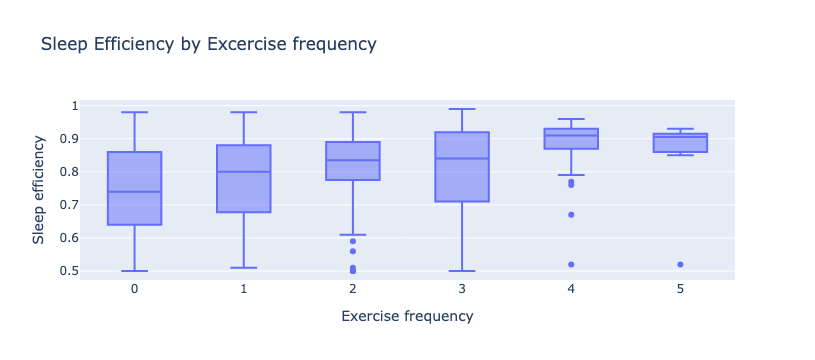

In [161]:
fig = px.box(df, y = "Sleep efficiency", x = "Exercise frequency", title = "Sleep Efficiency by Excercise frequency")
fig.show()

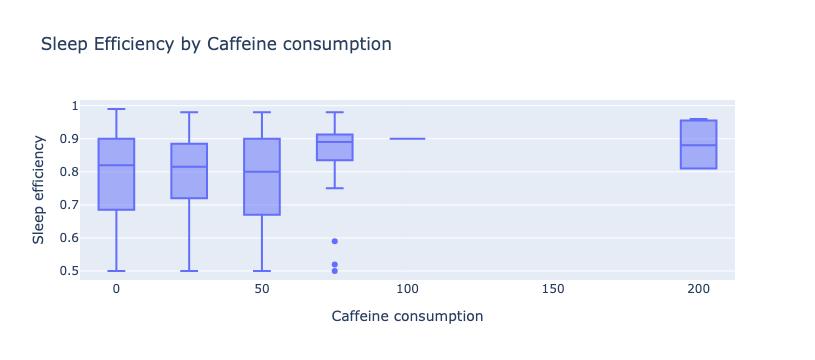

In [155]:
fig = px.box(df, y = "Sleep efficiency", x = "Caffeine consumption", title = "Sleep Efficiency by Caffeine consumption")
fig.show()

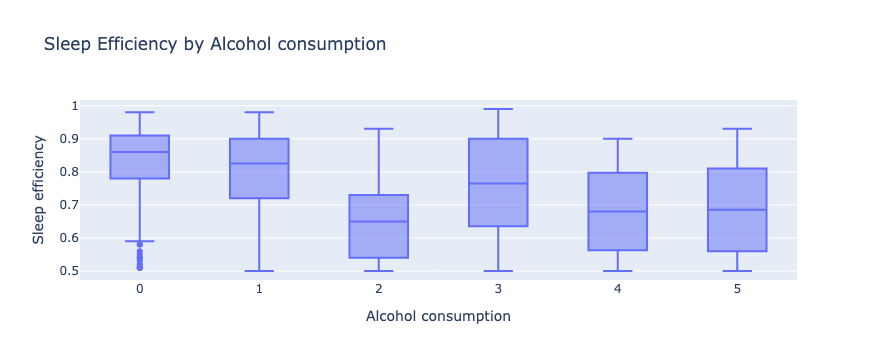

In [151]:
fig = px.box(df, y = "Sleep efficiency", x = "Alcohol consumption", title = "Sleep Efficiency by Alcohol consumption")
fig.show()

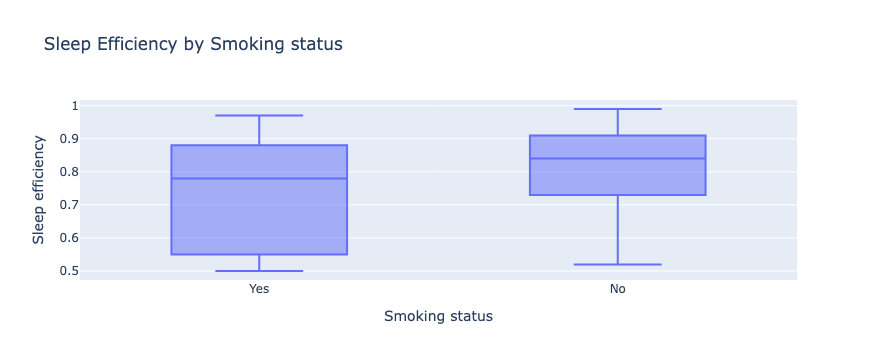

In [165]:
fig = px.box(df, y = "Sleep efficiency", x = "Smoking status", title = "Sleep Efficiency by Smoking status")
fig.show()

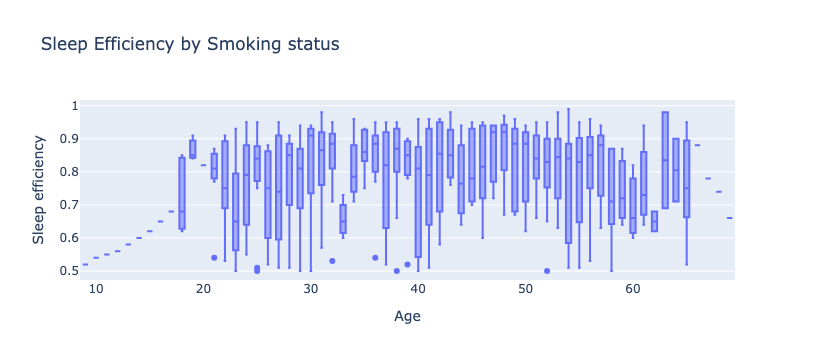

In [167]:
fig = px.box(df, y = "Sleep efficiency", x = "Age", title = "Sleep Efficiency by Smoking status")
fig.show()

In [93]:
df.select_dtypes(include = "number").columns

Index(['ID', 'Age', 'Sleep duration', 'Sleep efficiency',
       'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Exercise frequency'],
      dtype='object')

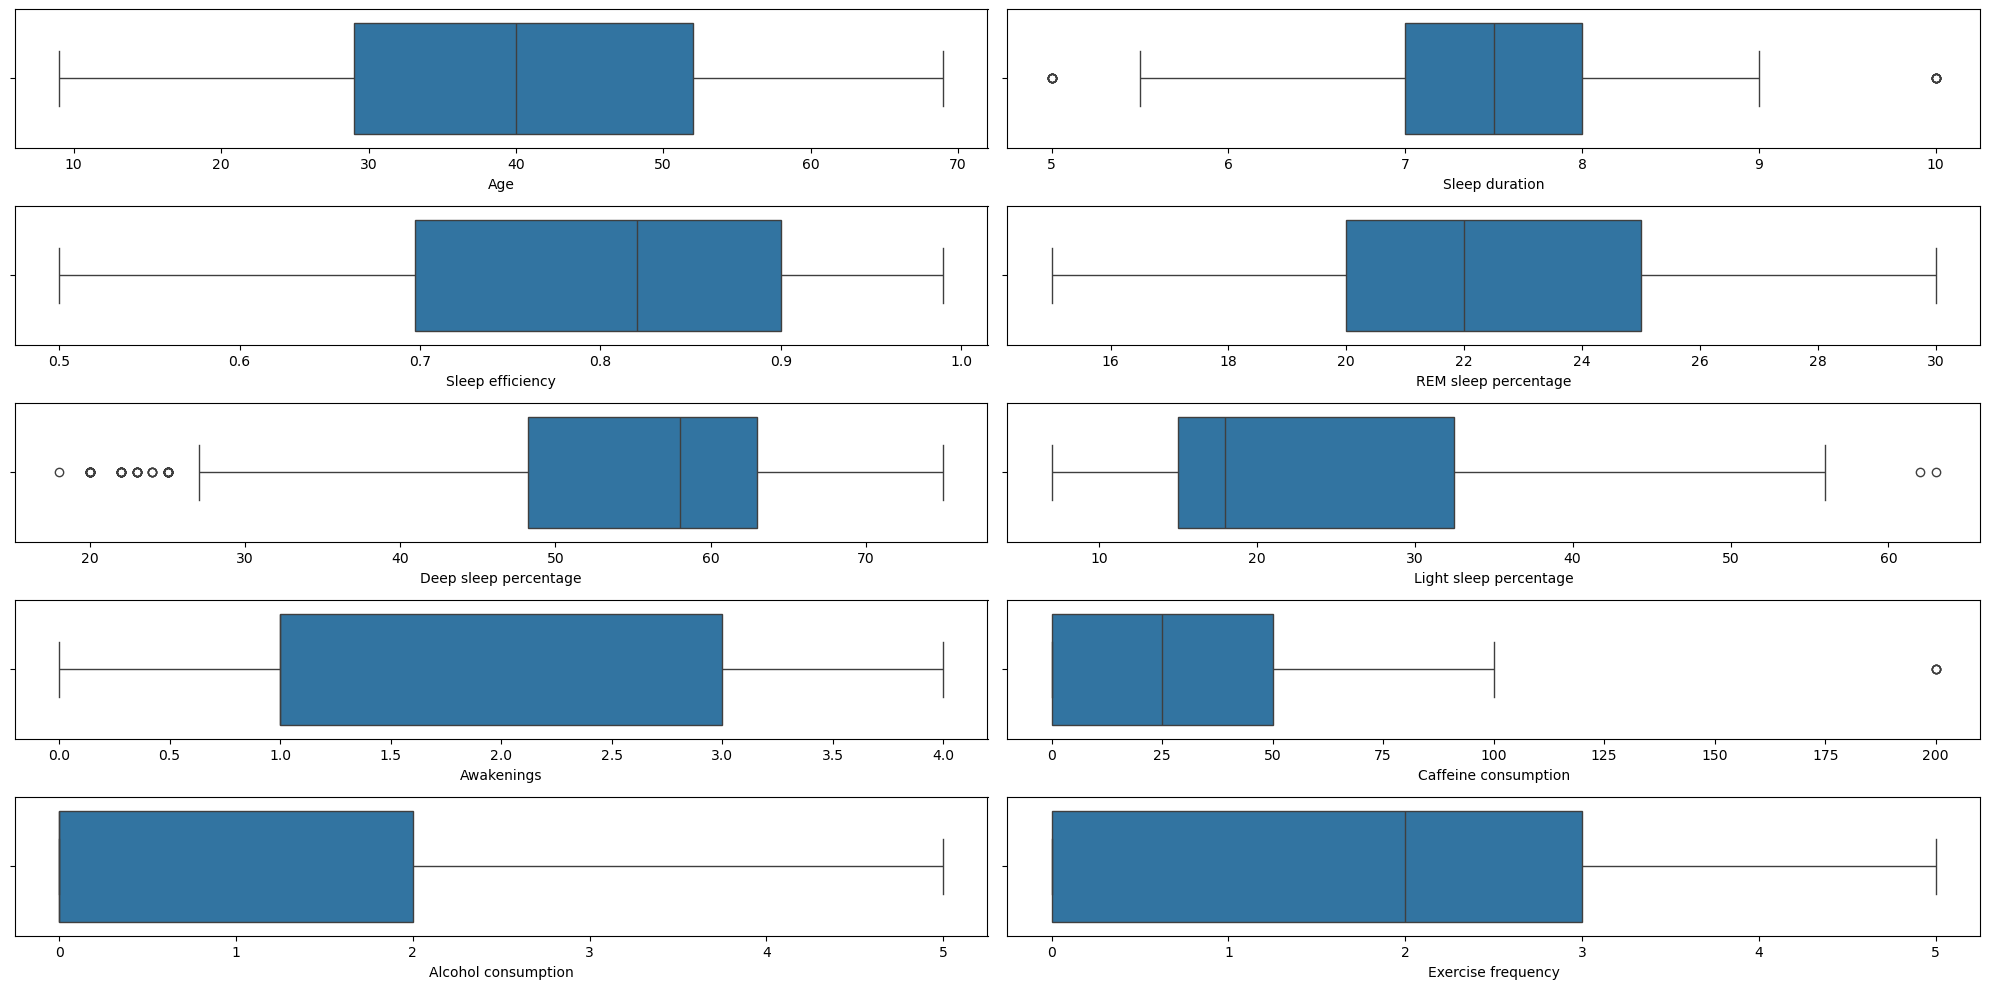

In [112]:
#check for outliers in numerical columns

num_vars = ['Age', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 
            'Deep sleep percentage','Light sleep percentage', 'Awakenings', 
'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

In [ ]:
#Remove Outliers